In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/kaju/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kaju/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kaju/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
torch.cuda.set_device(0)

In [4]:
PATH = "data/kaggle_data/flowers/"
sz = 160
arch = resnext101_64
bs = 58

In [5]:
os.listdir(PATH)

['valid', 'tmp', 'train', 'models']

In [6]:
os.listdir(f'{PATH}valid')

['sunflower', 'dandelion', 'daisy', 'rose', 'tulip']

In [7]:
files = os.listdir(f'{PATH}valid/daisy')[:5]
files

['34693373736_9ce6d9e1c3_n.jpg',
 '33839388103_79cb79f7bc_n.jpg',
 '34540113401_b81594e92a_n.jpg',
 '34520690871_8fe693bc71_n.jpg',
 '19544831049_0d738d4872_m.jpg']

In [8]:
img = plt.imread(f'{PATH}valid/daisy/{files[0]}')

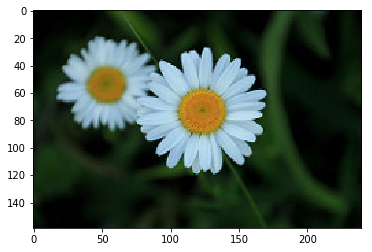

In [9]:
plt.imshow(img)

In [10]:
img.shape

(159, 240, 3)

In [11]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH,tfms=tfms_from_model(arch,sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01,2)

100%|██████████| 15/15 [00:05<00:00,  2.71it/s]


epoch      trn_loss   val_loss   accuracy                  
    0      0.772892   0.429964   0.850385  
    1      0.562354   0.331997   0.891089                  



[array([0.332]), 0.8910891089108911]

In [12]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 

In [13]:
data.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [14]:
log_preds = learn.predict()

In [15]:
log_preds.shape

(909, 5)

In [16]:
preds = np.argmax(log_preds, axis=1)

In [17]:
probs = np.exp(log_preds[:,1])

In [18]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [19]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [20]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


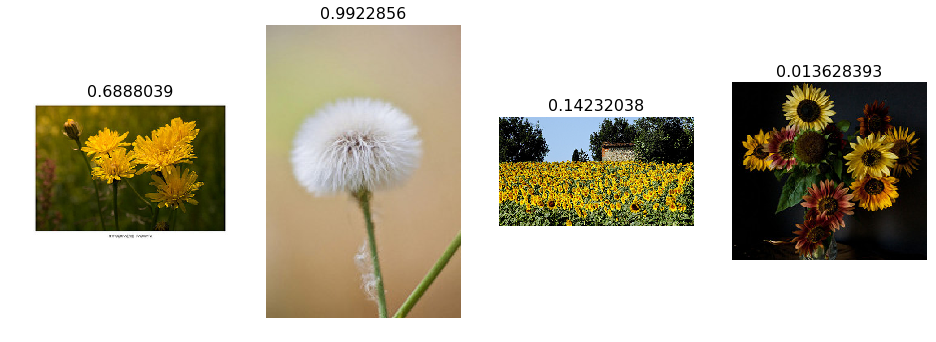

In [21]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


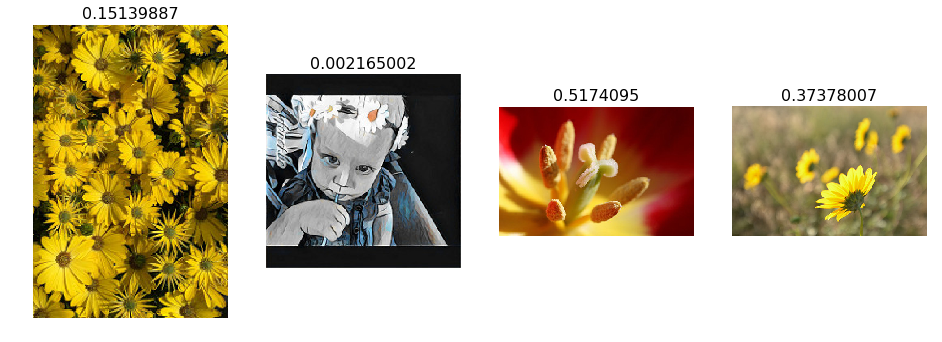

In [22]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [23]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct tulips


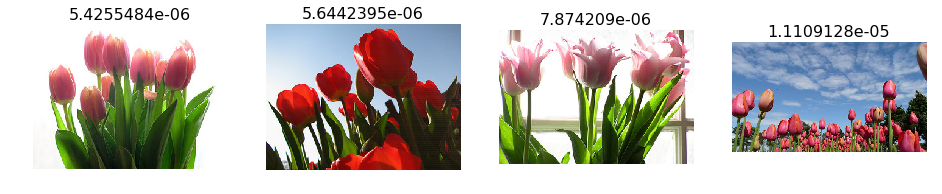

In [33]:
plot_val_with_title(most_by_correct(, True), "Most correct tulips")

Most correct dandelion


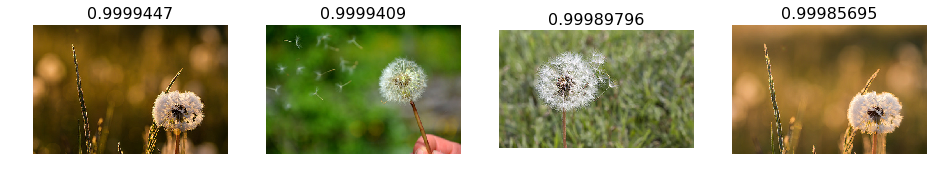

In [25]:
plot_val_with_title(most_by_correct(1, True), "Most correct dandelion")

Most correct daisy


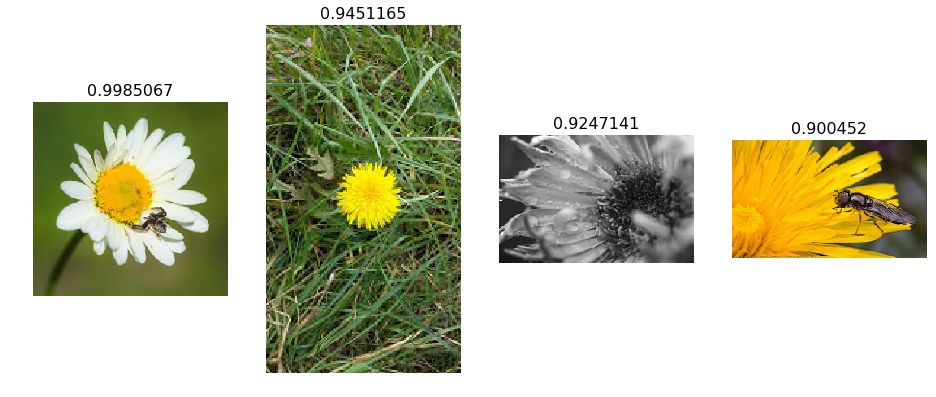

In [26]:
plot_val_with_title(most_by_correct(0, False), "Most correct daisy")

Most incorrect danda


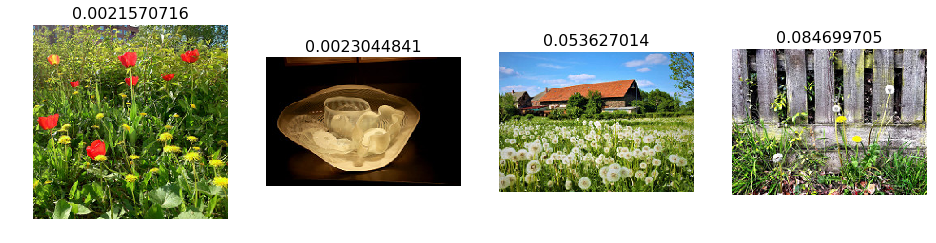

In [27]:
plot_val_with_title(most_by_correct(2, False), "Most incorrect danda")

In [28]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]

Most uncertain daisy


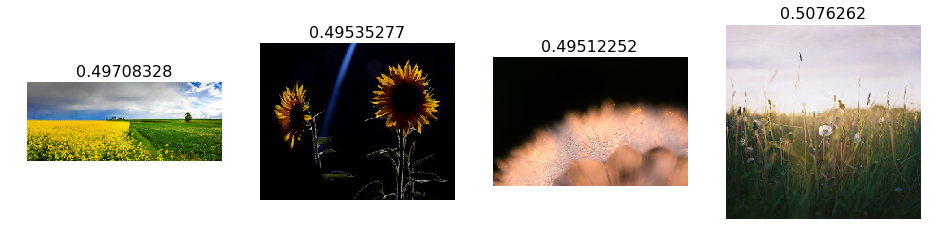

In [29]:
plot_val_with_title(most_uncertain, "Most uncertain daisy")

In [34]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf = learn.lr_find()

 52%|█████▏    | 28/54 [00:00<00:00, 51.02it/s, loss=1.94]


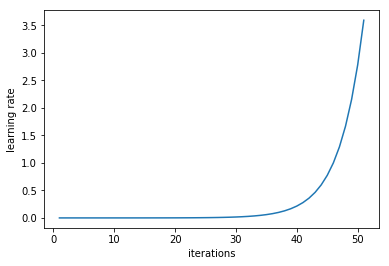

In [35]:
learn.sched.plot_lr()

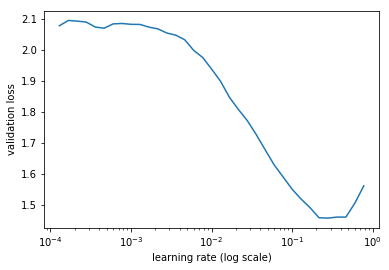

In [36]:
learn.sched.plot()

In [37]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [38]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [39]:
learn.fit(1e-2,1)

epoch      trn_loss   val_loss   accuracy                 
    0      0.755966   0.393705   0.864686  



[array([0.39371]), 0.8646864688435797]

In [40]:
learn.precompute=False

In [41]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.539856   0.362622   0.880088  
    1      0.522485   0.349245   0.883388                  
    2      0.490364   0.324249   0.89879                   



[array([0.32425]), 0.8987898791190421]

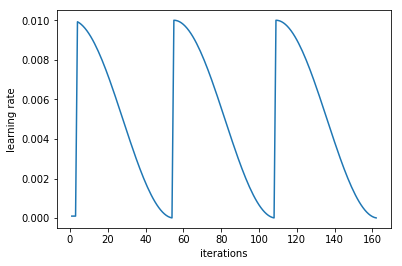

In [42]:
learn.sched.plot_lr()

In [43]:
learn.save('my_flowers_model')

In [44]:
learn.load('my_flowers_model')

In [45]:
learn.unfreeze()

In [46]:
lr=np.array([1e-4,1e-3,1e-2])

In [47]:
learn.fit(lr,3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.532876   0.364012   0.878988  
    1      0.439593   0.243384   0.921892                  
    2      0.337912   0.22652    0.929593                  
    3      0.310879   0.189342   0.947195                  
    4      0.253996   0.146709   0.958196                  
    5      0.212756   0.134366   0.959296                  
    6      0.189814   0.131043   0.961496                  



[array([0.13104]), 0.9614961496149615]

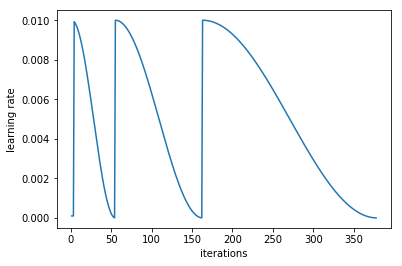

In [48]:
learn.sched.plot_lr()

In [49]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [50]:
accuracy_np(probs, y)

0.966996699669967

In [51]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[148   6   2   2   0]
 [  0 238   0   0   3]
 [  0   0 147   0   5]
 [  2   1   0 149   2]
 [  1   0   6   0 197]]


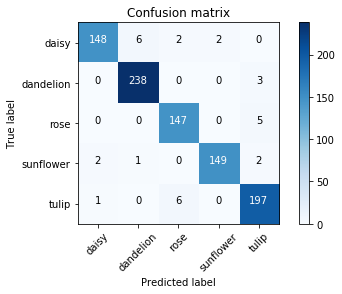

In [53]:
plot_confusion_matrix(cm, data.classes)

In [54]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [55]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.999999, 0.000000000001, 0.000001, 0.9999999])
binary_loss(acts, preds)

5.250005012458553e-07